# Day 5 Multilinear regression

Previously we have described how to use one variable to create a model that predicts a particular value. That process is called regression, and now we will allow ourselves to utilize multiple variables to create our models. Let's start by looking at some data about housing.

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’



The following objects are masked from ‘package:stats’:

    filter, lag



The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Load up the dataset.

```
houses<-read.csv("Nashville.csv")
```

In [2]:
houses<-read.csv("Nashville.csv")

Let's take a look at this data. 

```
head(houses)
str(houses)

In [3]:
head(houses)
str(houses)

ZipCode,Bedrooms,Bathrooms,Garage,Year,Sqft,Price
37221,5,4,Yes,1989,2502,349900
37221,3,2,Yes,1977,1875,399900
37211,4,2,No,2007,1793,299000
37221,5,3,Yes,2015,3204,525000
37216,3,2,No,1946,1236,299900
37221,4,3,No,1968,1940,275000


'data.frame':	102 obs. of  7 variables:
 $ ZipCode  : int  37221 37221 37211 37221 37216 37221 37023 37216 37216 37023 ...
 $ Bedrooms : int  5 3 4 5 3 4 3 2 3 2 ...
 $ Bathrooms: num  4 2 2 3 2 3 1 4 2 1 ...
 $ Garage   : Factor w/ 3 levels "Maybe","No","Yes": 3 3 2 3 2 2 2 2 2 2 ...
 $ Year     : int  1989 1977 2007 2015 1946 1968 2001 1950 1938 2002 ...
 $ Sqft     : int  2502 1875 1793 3204 1236 1940 1032 2541 1715 816 ...
 $ Price    : int  349900 399900 299000 525000 299900 275000 80000 475000 337900 45000 ...


## Nashville houses

This dataset shows us some information about houses that were listed as on sale on the Zillow website in the fall of 2018. Our goal is to create a function or model that will help us predict the value of the home. Let's start by calculating some of the correlations between these variables. This can be more easily done almost at once with the ```cor``` command on the whole dataframe, but we need to exclude the Garage categorey. 

```
cor(houses[,c(1,2,3,5,6,7)])
```

The ```houses[,c(1,2,3,5,6,7)]``` part of this code says that I want to pick particular columns. The first comma indicates that I am picking columns. The ```c()``` command concatenates (groups) together the number associated with that column. The *Garage* column is a text column and is column number 4, and we are trying to exclude it.

In [4]:
cor(houses[,c(1,2,3,5,6,7)])

,ZipCode,Bedrooms,Bathrooms,Year,Sqft,Price
ZipCode,1.00000000,0.098992157,0.3411232,-0.137550737,0.26205659,0.4362059
Bedrooms,0.09899216,1.000000000,0.5664773,-0.005184369,0.73496810,0.1361090
Bathrooms,0.34112320,0.566477263,1.0000000,0.104900902,0.75386092,0.3611829
Year,-0.13755074,-0.005184369,0.1049009,1.000000000,-0.07765271,-0.1060682
Sqft,0.26205659,0.734968102,0.7538609,-0.077652711,1.00000000,0.4965814
Price,0.43620592,0.136108990,0.3611829,-0.106068208,0.49658144,1.0000000


Even better than the ```cor``` function is the ```plot``` function when you don't have too many variables.

```
plot(houses[,c(1,2,3,5,6,7)])
```


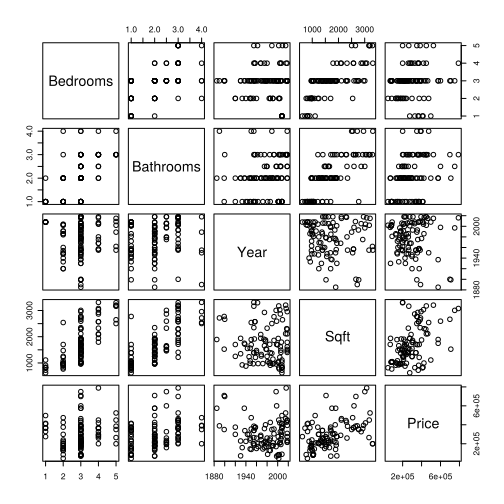

In [5]:
plot(houses[,c(2,3,5,6,7)])

**Question** Which variables are correlated to the price? Which of these do you believe?

The variables that are correlated are, in order, Sqft, Bathrooms, Bedrooms, and then Year. I think all of them could be relevant to the price. 

Let's make a simple linear model as we did last time and then create the scatterplot with the line.

```
simplemodel<-lm(Price~Sqft, data=houses)
summary(simplemodel)
plot(houses$Sqft,houses$Price,col = "blue",main = "Housing price vs Square Footage in Nashville 2018",
abline(simplemodel),cex = 1.3,pch = 16, 
    xlab = "Square Footage",ylab = "Price")
```



Call:
lm(formula = Price ~ Sqft, data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-261758  -77936  -26644   69163  434207 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 115145.9    34016.2   3.385  0.00102 ** 
Sqft           104.7       18.3   5.721 1.11e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131700 on 100 degrees of freedom
Multiple R-squared:  0.2466,	Adjusted R-squared:  0.2391 
F-statistic: 32.73 on 1 and 100 DF,  p-value: 1.107e-07


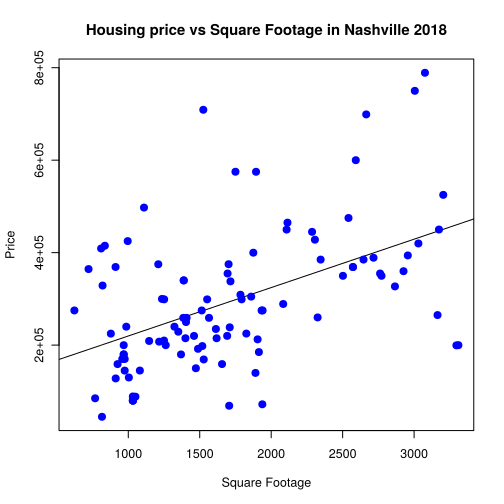

In [6]:
simplemodel<-lm(Price~Sqft, data=houses)
summary(simplemodel)
plot(houses$Sqft,houses$Price,col = "blue",main = "Housing price vs Square Footage in Nashville 2018",
abline(simplemodel),cex = 1.3,pch = 16, 
    xlab = "Square Footage",ylab = "Price")

Note several things in the summary. The asterisks at the end of the Coefficient table tell us that there is statistical evidence for a relationship between the variable Sqft and Price. 

**Question** What percentage of the variation in price is explained by variation in the square footage? Where do you find that number in the summary?

**24.66% of the variation is explained. It is listed as the R-squared value.**

**Question** What is the coefficient of square footage in the equation of our model? What does it mean in context of this problem?

**104.7. The value of the house increases by $104.70 for every square foot.**

## Multilinear Analysis

It looks as though Square footage is not the only major contributor to the price of the house. The number of bathrooms seems to be another variable that would make a difference, especially considering its correlation with the price.

```
multimodel<-lm(Price~Sqft+Bathrooms, data=houses)
summary(multimodel)
```

In [7]:
multimodel<-lm(Price~Sqft+Bathrooms, data=houses)
summary(multimodel)


Call:
lm(formula = Price ~ Sqft + Bathrooms, data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-263376  -75388  -22191   69620  434597 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 118388.71   36975.98   3.202 0.001837 ** 
Sqft           109.54      27.98   3.914 0.000167 ***
Bathrooms    -5513.37   23987.59  -0.230 0.818688    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 132400 on 99 degrees of freedom
Multiple R-squared:  0.247,	Adjusted R-squared:  0.2318 
F-statistic: 16.24 on 2 and 99 DF,  p-value: 7.971e-07


### Analyze the Coefficient Table

When we look at the coefficient table it shows no asterisks next to the line for Bathrooms. This indicates that we can't be confident that the coefficient of Bathrooms isn't zero. The coefficient we have right not for bathrooms is -5513.37, which seems far from zero, but given the variation in prices we see in houses with different bathrooms that just isn't enough. Our model would be better without using Bathrooms as an explainer variable. Let's try Bedrooms.

```
multimodel2<-lm(Price~Sqft+Bedrooms, data=houses)
summary(multimodel2)
```

In [8]:
multimodel2<-lm(Price~Sqft+Bedrooms, data=houses)
summary(multimodel2)


Call:
lm(formula = Price ~ Sqft + Bedrooms, data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-294663  -78418   -1495   56652  454782 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 229491.09   41635.64   5.512 2.82e-07 ***
Sqft           181.80      24.99   7.276 8.23e-11 ***
Bedrooms    -84174.83   20044.91  -4.199 5.86e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 122000 on 99 degrees of freedom
Multiple R-squared:  0.3605,	Adjusted R-squared:  0.3476 
F-statistic:  27.9 on 2 and 99 DF,  p-value: 2.449e-10


Here we see that Bedrooms is significant. 

**Question** What is the formula for Price given by this model?

$\widehat{Price}=2229491.09+181.80*Sqft-84174.83*Bedrooms$

### Make a prediction

As we did last week we can make predictions base on our models. 

Here is how we would make a prediction based on our simple model that just uses square footage. 

```
predict(simplemodel,data.frame(Sqft = c(4050,2300,1400)))
```


In [9]:
predict(simplemodel,data.frame(Sqft = c(4050,2300,1400)))

1 
 539126.213132607 
 2 
 355924.863656942 
 3 
 261707.026783743

To make a prediction with our multilinear model we simply must put in more information.

```
predict(multimodel2,data.frame(Sqft = c(4050,2300,1400), Bedrooms=c(3, 2, 5)))
```

In [10]:
predict(multimodel2,data.frame(Sqft = c(4050,2300,1400), Bedrooms=c(3, 2, 5)))

1 
 713273.258097053 
 2 
 479290.887316504 
 3 
 63142.6852200075

### How much better is multimodel2 than simplemodel

**Question** How much more of the variation does multimodel2(Sqft and Bedrooms) explain than simplemodel? How much more did multimodel(Sqft and Bathrooms) do than simplemodel?

Look at the 5 number summaries of the residuals of simplemodel and the 5 number summaries of multimodel2. **Question** How much have we improved our estimates for the middle 50%

### Can we get more out a categorical variable

Does having a Garage matter. Let's try to determine if we could improve our estimate by considering if the house has a garage.

We will start by computing how wrong our model is in each of cases of our dataset, and adding that information on to our dataframe.

```
houses<-houses %>%
    mutate(residualmulti = resid(multimodel2))
```

In [11]:
houses<-houses %>%
    mutate(residualmulti = resid(multimodel2))
head(houses)

ZipCode,Bedrooms,Bathrooms,Garage,Year,Sqft,Price,residualmulti
37221,5,4,Yes,1989,2502,349900,86409.18
37221,3,2,Yes,1977,1875,399900,82050.69
37211,4,2,No,2007,1793,299000,80233.46
37221,5,3,Yes,2015,3204,525000,133882.69
37216,3,2,No,1946,1236,299900,98223.52
37221,4,3,No,1968,1940,275000,29508.26


Now we create a box plot to show the differences between our errors in houses that have garages and houses that don't 

```
ggplot(data=houses, aes(x=Garage, y=residualmulti, group=Garage))+geom_boxplot()
```

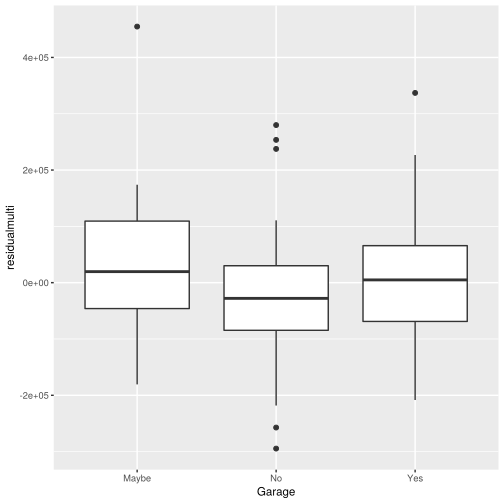

In [12]:
ggplot(data=houses, aes(x=Garage, y=residualmulti, group=Garage))+geom_boxplot()

Let's look at straight numbers rather than just graphs. Let's see the medians of the the residual by group.

```
houses %>%
  group_by(Garage) %>%
  summarise(median_garage = median(residualmulti), n = n())
```

So it seems that Garage might have some effect on the price. Homes that don't have a garage are being overestimeated by $27853, while homes with a garage are being underestimated by the $4906. The houses in the Maybe categorey seem to be being underestimaed so let's assume that they really do have garages. Let's add a new variable called NumGarage which which will be 1 if there is a garage and 0 if there isn't.

```
houses<-houses %>%
    mutate(NumGarage=ifelse(Garage=="No", 0, 1))
multimodel3<-lm(Price~Sqft+Bedrooms+NumGarage, data=houses)
summary(multimodel3)
```

In [13]:
houses<-houses %>%
    mutate(NumGarage=ifelse(Garage=="No", 0, 1))
multimodel3<-lm(Price~Sqft+Bedrooms+NumGarage, data=houses)
summary(multimodel3)


Call:
lm(formula = Price ~ Sqft + Bedrooms + NumGarage, data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-265746  -72514   -3372   56551  439632 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211228.85   43533.22   4.852 4.61e-06 ***
Sqft           174.68      25.41   6.874 5.85e-10 ***
Bedrooms    -80940.91   20094.52  -4.028 0.000111 ***
NumGarage    34579.87   25189.28   1.373 0.172947    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 121400 on 98 degrees of freedom
Multiple R-squared:  0.3726,	Adjusted R-squared:  0.3534 
F-statistic:  19.4 on 3 and 98 DF,  p-value: 5.948e-10


Now let's calculate one more model

```
multimodel3<-lm(Price~Sqft+Bedrooms+NumGarage, data=houses)
summary(multimodel3)
```

Again our variable is not statistically significant, and therefore we can't tell if it really has an effect on the price of the house. We would be generally better off ignoring the garage data for now. There is a danger of overfitting.

## Your Turn

Load up the dataset for Prices for Used Camrys. Follow the steps to create a multilinear model to estimate the price of a Used Camry. 

```
camry<-read.csv("Camry1.csv")
```


In [14]:
camry<-read.csv("Camry1.csv")


**Question** Show the top of this dataset to get a feel for the variables it contains. 

In [15]:
head(camry)

ModelYear,Trim,Hybrid,VIN,Mileage,Price
2018,SE,FALSE,4T1B11HKXJU054087,5275,17998
2015,unknown,FALSE,4T1BK1FK9FU565748,43696,17898
2017,SE,FALSE,4T1BF1FKXHU310243,41522,17700
2018,LE,FALSE,4T1B11HK9JU562809,5242,16998
2014,XLE,FALSE,4T1BK1FK1EU539224,38410,16965
2017,SE,FALSE,4T1BF1FK2HU788124,9930,16299


**Question** Create a table show the corrlations of the numeric variables.

In [16]:
cor(camry[,c(1, 5,6)])

,ModelYear,Mileage,Price
ModelYear,1.0000000,-0.8094151,0.8667491
Mileage,-0.8094151,1.0000000,-0.8089737
Price,0.8667491,-0.8089737,1.0000000


**Question** Create a plot showing scatterplots of all the numeric variables.

In [0]:
plot(camry[,c()])

**Question** Create a  simple linear model predicting price from the mileage. Find the percent of the variation of the price that is explained by the variation in the mileage.

**Question** Create a  multi-linear model predicting price from the mileage and another numeric variable that is significant to the price. Find the percent of the variation of the price that is explained by this model.

**Question** Create comparitive boxplot that shows the relationship the residuals of your multimodel and if the car is a hybrid.

**Question** Predict the price of 3 cars: A 2013 camry with 32,000 miles, a 2010 camry with 89000, and a 2016 camry with 90000 miles.